# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [151]:
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

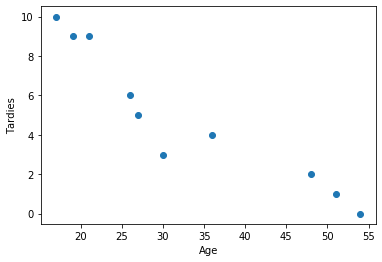

In [152]:
plt.scatter(student_data.age,student_data.tardies)
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [153]:
#There is an approx. linear descending trend.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [154]:
import statistics
# Your response here.
#correlation:

print((student_data.age).corr(student_data.tardies)) 

#covariance:

print((student_data.age).cov(student_data.tardies)) 

# Corr (x,y) = Cov (x,y) / [Stdev(x) x Stdev(y)]
#used statistics version of stdev because np one does not give the result below
print((student_data.age).cov(student_data.tardies)/(statistics.stdev(student_data.age)*statistics.stdev(student_data.tardies)))

#both measures show a high "negative" relation between the variables, i.e.when age increases the tardies
#decrease.

-0.9391626886887122
-45.56666666666666
-0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [155]:
X = student_data.age
Y = student_data.tardies


slope, intercept, r_value, _, std_err = stats.linregress(X, Y) 

predictions = slope * X + intercept

#outcome variable is Y. Using linear regression with 1 variable

Plot your regression model on your scatter plot.

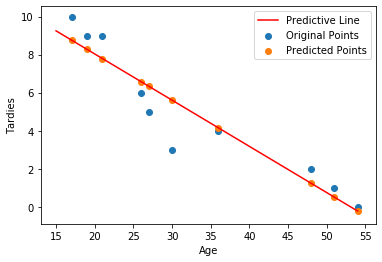

In [156]:
#original points
plt.scatter(X,Y, label = 'Original Points')
plt.xlabel('Age')
plt.ylabel('Tardies')

#points estimated with regression 
plt.scatter (X, predictions,label = 'Predicted Points')

#regression line
regression_line = slope * np.arange(15,55,1) + intercept 
plt.plot(np.arange(15,55,1),regression_line, color='r', label = 'Predictive Line')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [157]:
RMSE = (sum(predictions ** 2)/len(X)) ** 0.5
RMSE
# The model is a simple one (linear), so it is away from the prediction for some of the central points.
# A polynomial curve would eventually fit this data better, but as a predictive solution that might
# proove to the be actually an overfitting solution. I would say Age is a fairly good predictor
# of tardiness given the small data set - As as increases the trend is clearly for tardiness to decrease
# Also, we might have some outliers.

5.82821411885874

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [158]:
vehicles = pd.read_csv('vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

AxesSubplot(0.125,0.657941;0.352273x0.222059)
AxesSubplot(0.547727,0.657941;0.352273x0.222059)
AxesSubplot(0.125,0.391471;0.352273x0.222059)
AxesSubplot(0.547727,0.391471;0.352273x0.222059)
AxesSubplot(0.125,0.125;0.352273x0.222059)


,CO2 Emission Grams/Mile
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


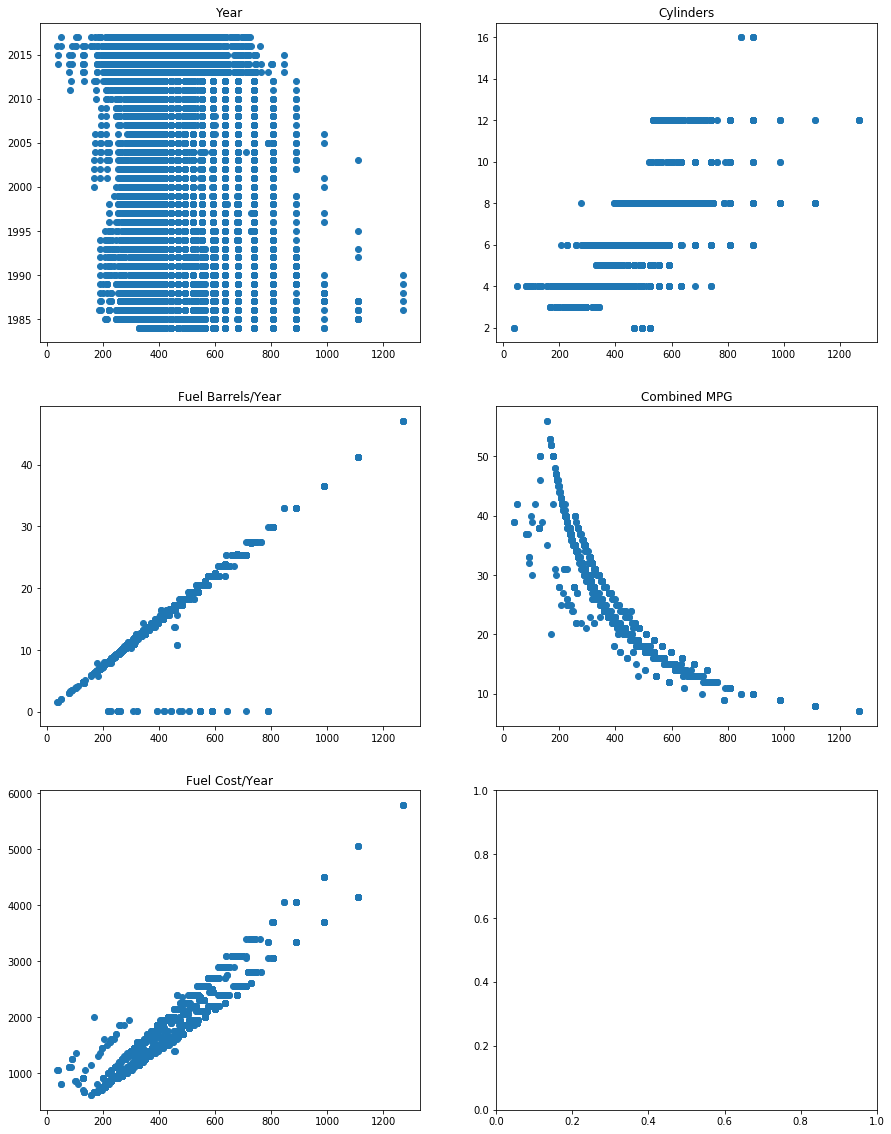

In [159]:
correl = vehicles.corr().loc [['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'],['CO2 Emission Grams/Mile']]
correl
#based only on Corr Fuel Barrels/Year would be the most important in determining the outcome, whilst
# Year would be the least important.

# the plots below support the conclusions of the correl values above
fig, axs = plt.subplots (3,2, figsize = (15,20))
to_scatter = list(correl.index)

ax1 = axs.flatten() [0:5]
print(ax1)
for i,ax in enumerate(ax1):
    print(ax)
    plt.sca(ax)
    plt.scatter(vehicles['CO2 Emission Grams/Mile'], vehicles[to_scatter[i]])
    plt.title(to_scatter[i])
    
correl

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Intercept:  131.1563247541947
Coef:  [ 1.04483633 19.62713308 -3.16658852  0.029393  ]
R:  0.9802919387898396
Intercept:  12.486520830758195
Coef:  [26.2836254]
R:  0.9725680773391494


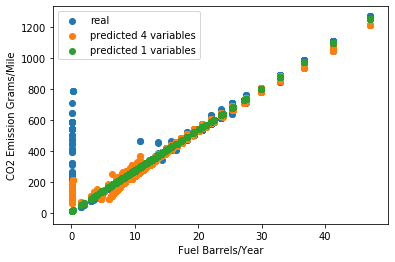

In [167]:
#with 4 variables
y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

lm = LinearRegression()
model = lm.fit(X,y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
print("R: ", lm.score(X,y))
y_pred  = lm.predict(X)


#just with 1 variable, the one with most corr and showing a linear behavior
y1 = vehicles['CO2 Emission Grams/Mile']
X1 = vehicles[['Fuel Barrels/Year']]

lm1 = LinearRegression()
model1 = lm1.fit(X1,y1)

print("Intercept: ", lm1.intercept_)
print("Coef: ", lm1.coef_)
print("R: ", lm1.score(X1,y1))
y_pred1  = lm1.predict(X1)

#Used linear regression with 4 variables (although 2 do not actually have a linear relation 
#to the outcome. Also testes with only the linear variable and result has only marginally worst 
#R2 score. Given the very linear realtion between Fuel Barrels/Year and the outcome, and the
#close  results from the added complexiity I would go with just linear reg. with that variable.

plt.scatter(vehicles['Fuel Barrels/Year'], y, label = 'real')
plt.scatter(vehicles['Fuel Barrels/Year'],y_pred, label = 'predicted 4 variables')
plt.scatter(vehicles['Fuel Barrels/Year'],y_pred1, label = 'predicted 1 variables')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.legend()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [161]:
print("Intercept 4 var: ", lm.intercept_)
print("Coef 4 var: ", lm.coef_)
print("R2 4 var: ", lm.score(X,y))
y_pred  = lm.predict(X)

print("Intercept 1var : ", lm1.intercept_)
print("Coef 1var: ", lm1.coef_)
print("R2 1 var: ", lm1.score(X1,y1))
y_pred1  = lm1.predict(X1)

#already commented above Fuel Barrels/Year is very correlated to CO2 Emission Grams/Mile with a very 
#very close linear relationship, so this is clearly the most important variable. Adding other variables
# with linear regression introduces minor improvement. To improve even further, probably
# changing Combined MPG to -quadratic since it exhibts that pattern vs the outcome would improve 
#even further.

Intercept 4 var:  131.1563247541947
Coef 4 var:  [ 1.04483633 19.62713308 -3.16658852  0.029393  ]
R2 4 var:  0.9802919387898396
Intercept 1var :  12.486520830758195
Coef 1var:  [26.2836254]
R2 1 var:  0.9725680773391494


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [162]:
party_data = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attended': [1,2,4,4,5,7,8,13]})
party_data

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

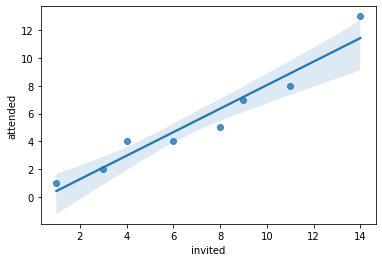

In [163]:
p = sns.regplot(party_data.invited, party_data.attended)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [164]:
slope, intercept, r_value, _, std_err = stats.linregress(party_data.invited, party_data.attended)

res = party_data.invited * slope +intercept
print("Intercept: ", intercept)
print("Coef: ", slope)
print("R: ",r_value)

#relationship is approx. linear

Intercept:  -0.43939393939393945
Coef:  0.8484848484848485
R:  0.9652303546573691


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Intercept:  -0.489247311827957
Coef:  0.7688172043010753
R:  0.9820353917544755


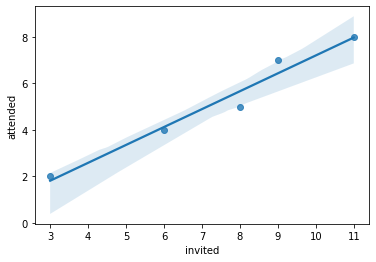

In [165]:
# Will remove (4,4) (8,4) and (14,12)

party2 = party_data.drop([0,2,7], axis = 0)

slope2, intercept2, r_value2, _, std_err2 = stats.linregress(party2.invited, party2.attended)

res2 = party2.invited * slope2 +intercept2
print("Intercept: ", intercept2)
print("Coef: ", slope2)
print("R: ",r_value2)

p = sns.regplot(party2.invited, party2.attended)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [166]:
"""
When the supposed outliers are removed, R increases showing a higher correlation. The RMSE 
decreases. The removed points were "pulling" the rect away from the position. By leaving the points
closer to the linear relation, the accuracy of the model improves. But... were those points really
outliers? All of them...
"""

'\nWhen the supposed outliers are removed, R increases showing a higher correlation. The RMSE \ndecreases. The removed points were "pulling" the rect away from the position. By leaving the points\ncloser to the linear relation, the accuracy of the model improves. But... were those points really\noutliers? All of them...\n'